<a href="https://colab.research.google.com/github/KeshavAman/Customer-Segmentation-Using-K-Means-Clustering/blob/main/Mall_Customers_Clustering_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing the Libraries**

In [1]:
import numpy as np
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the Dataset**

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/KeshavAman/Customer-Segmentation-Using-K-Means-Clustering/main/Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Checking if there is any NULL data**

In [5]:
dataset.isnull().any().any()

False

**Data Visualization**

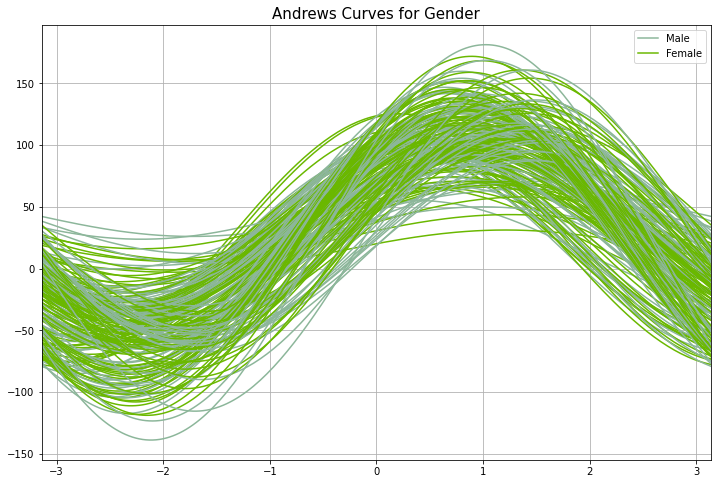

In [10]:
fig = plt.figure(figsize= (12,8))

plotting.andrews_curves(dataset.drop('CustomerID', axis = 1), 'Genre' )
plt.title('Andrews Curves for Gender', fontsize = 15)
plt.show()

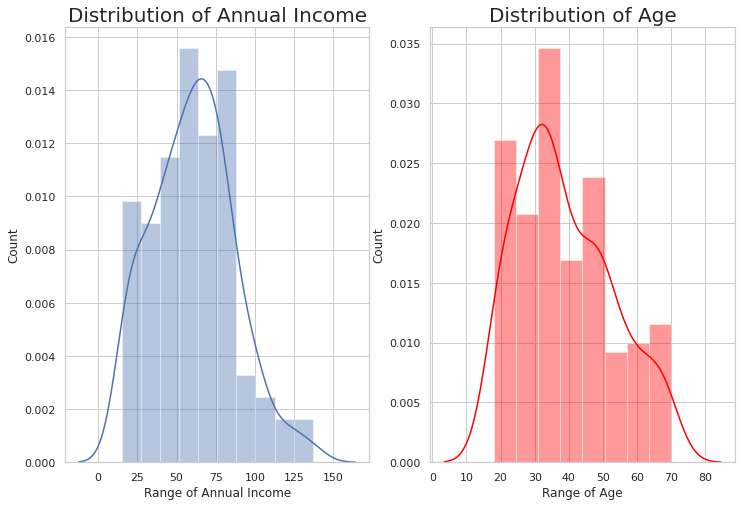

In [18]:
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize= (12,8))

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(dataset['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(dataset['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()


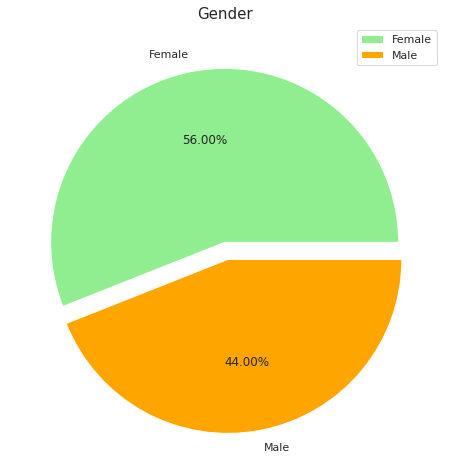

In [23]:
labels = ['Female', 'Male']
size = dataset['Genre'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

fig = plt.figure(figsize= (8,8))
plt.pie(size, labels= labels, explode= explode, colors= colors, autopct= '%.2f%%')
plt.title('Gender', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

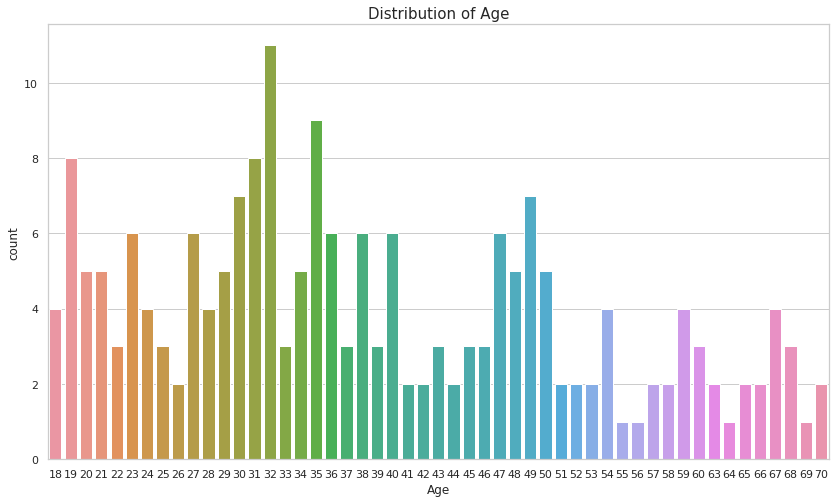

In [26]:
fig = plt.figure(figsize= (14,8))
sns.countplot(dataset['Age'])
plt.title('Distribution of Age', fontsize = 15)
plt.show()

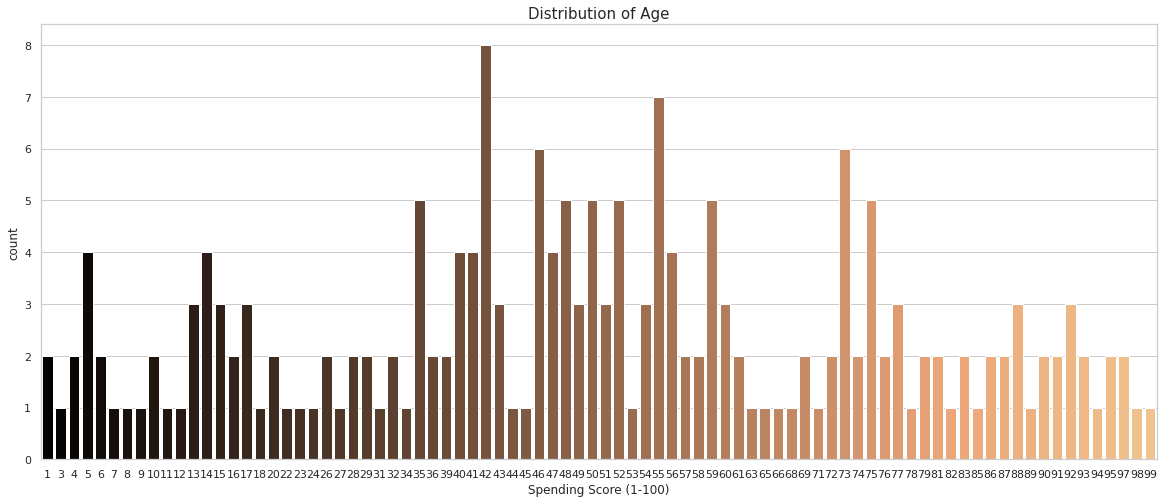

In [29]:
fig = plt.figure(figsize= (20,8))
sns.countplot(dataset['Spending Score (1-100)'], palette= 'copper')
plt.title('Distribution of Age', fontsize = 15)
plt.show()

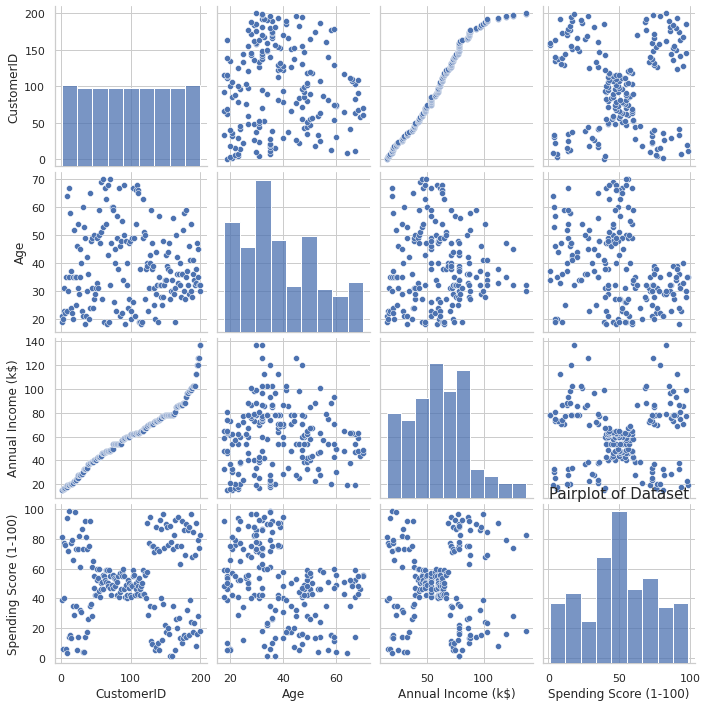

In [30]:
sns.pairplot(dataset)
plt.title('Pairplot of Dataset', fontsize= 15)
plt.show()

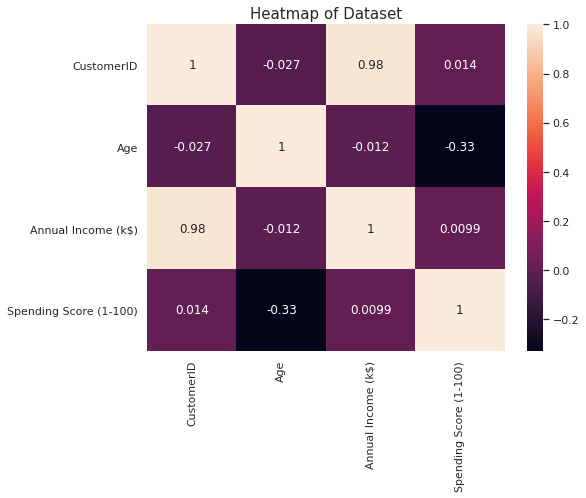

In [33]:
fig = plt.figure(figsize= (8,6))
sns.heatmap(dataset.corr(), annot= True)
plt.title('Heatmap of Dataset', fontsize= 15)
plt.show()

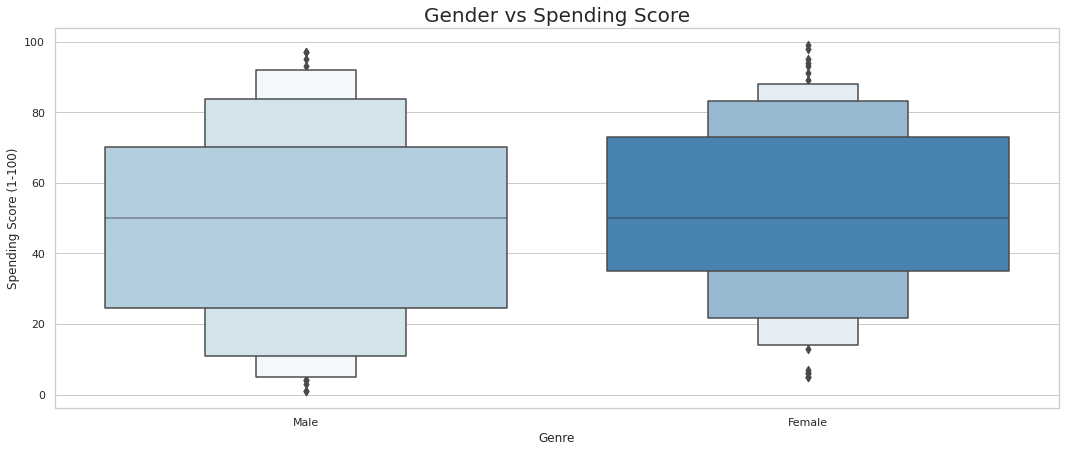

In [41]:
fig = plt.figure(figsize= (18,7))
sns.boxenplot(dataset['Genre'], dataset['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

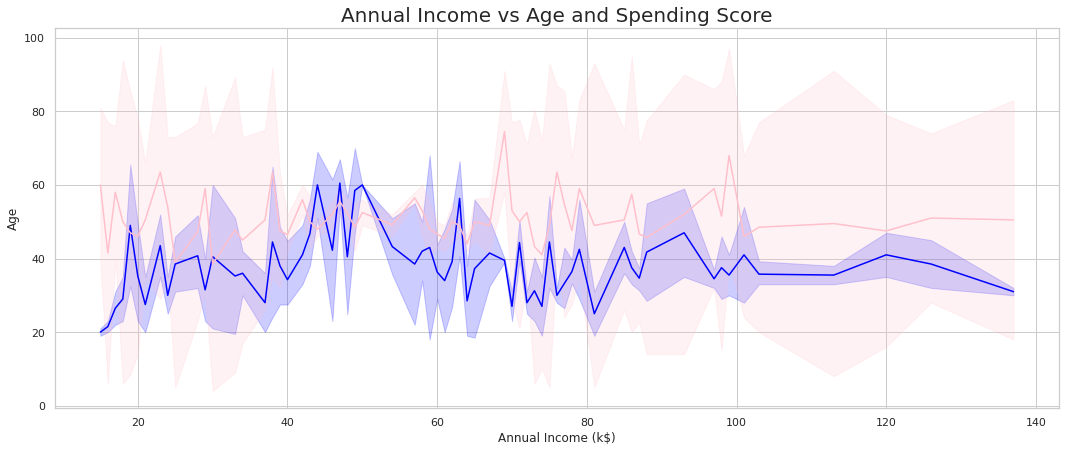

In [40]:
x = dataset['Annual Income (k$)']
y = dataset['Age']
z = dataset['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

**Clusters analysis of Customers Based on their Annual Income**

In [42]:
x = dataset.iloc[:, [3, 4]].values

print(x.shape)

(200, 2)


**Using KMeans Algorithm**

***Using Elbow Method to find the No. of Optimal Clusters***

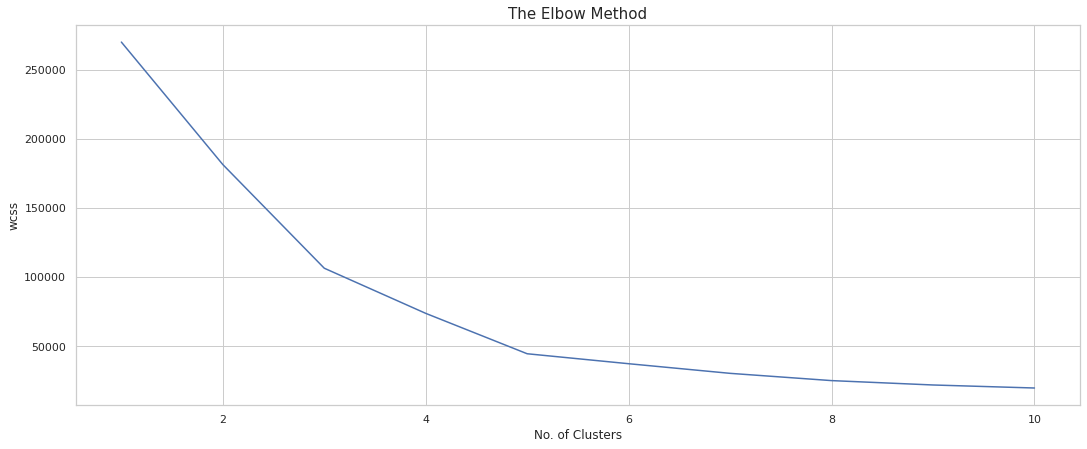

In [43]:
from sklearn.cluster import KMeans

wcss = []
for i in range (1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 15)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show() 

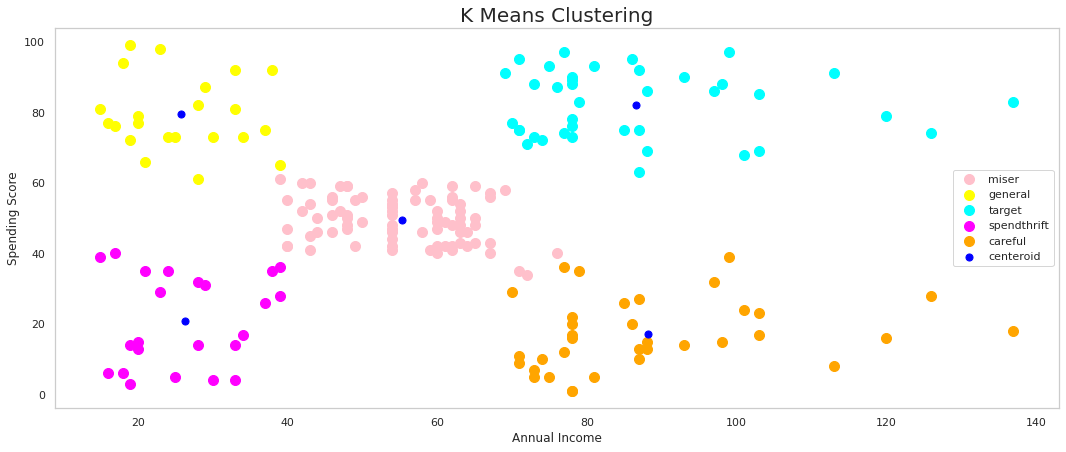

In [44]:
km = KMeans(n_clusters= 5, init= 'k-means++', max_iter= 300, n_init= 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0,0], x[y_means == 0,1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1,0], x[y_means == 1,1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2,0], x[y_means == 2,1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3,0], x[y_means == 3,1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4,0], x[y_means == 4,1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 50, c = 'blue', label = 'centeroid')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

**Using Hierarchial Clustering**

***Using Dendrograms to find the no. of Optimal Clusters***

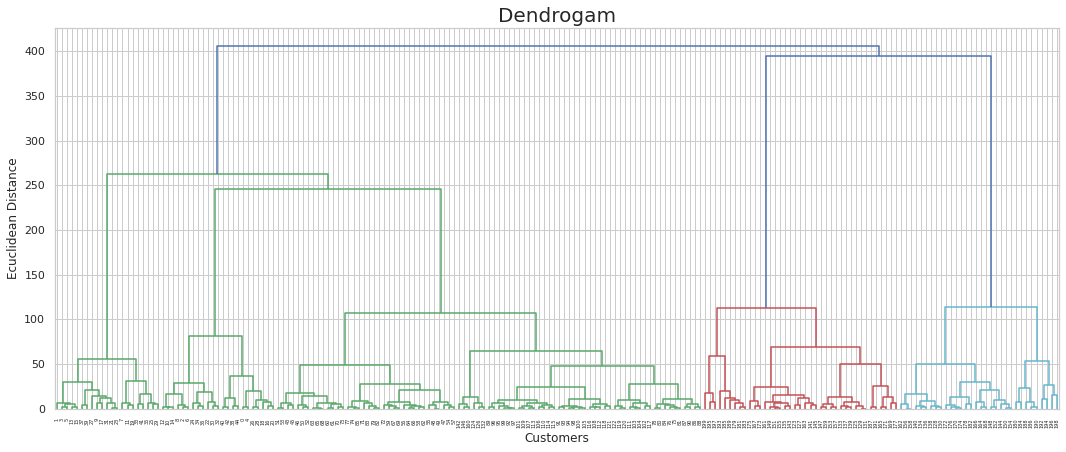

In [46]:
from scipy.cluster import hierarchy as sch

dendogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

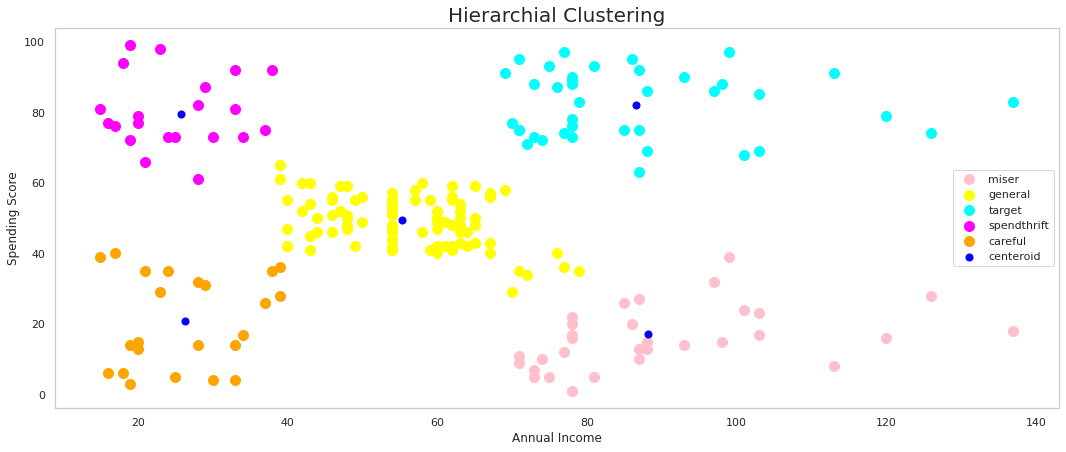

In [48]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)
plt.scatter(x[y_hc == 0,0], x[y_hc == 0,1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_hc == 1,0], x[y_hc == 1,1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_hc == 2,0], x[y_hc == 2,1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_hc == 3,0], x[y_hc == 3,1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_hc == 4,0], x[y_hc == 4,1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 50, c = 'blue', label = 'centeroid')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

**Clusters analysis of Customers Based on their Age**

In [49]:
x = dataset.iloc[:, [2, 4]].values

print(x.shape)

(200, 2)


**Using KMeans Algorithm**

***Using Elbow Method to find the No. of Optimal Clusters***

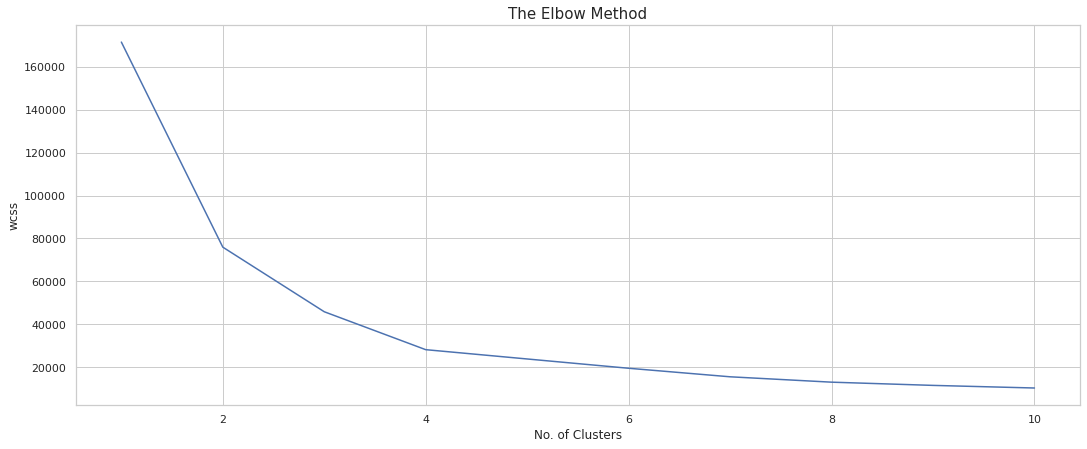

In [50]:
from sklearn.cluster import KMeans

wcss = []
for i in range (1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 15)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show() 

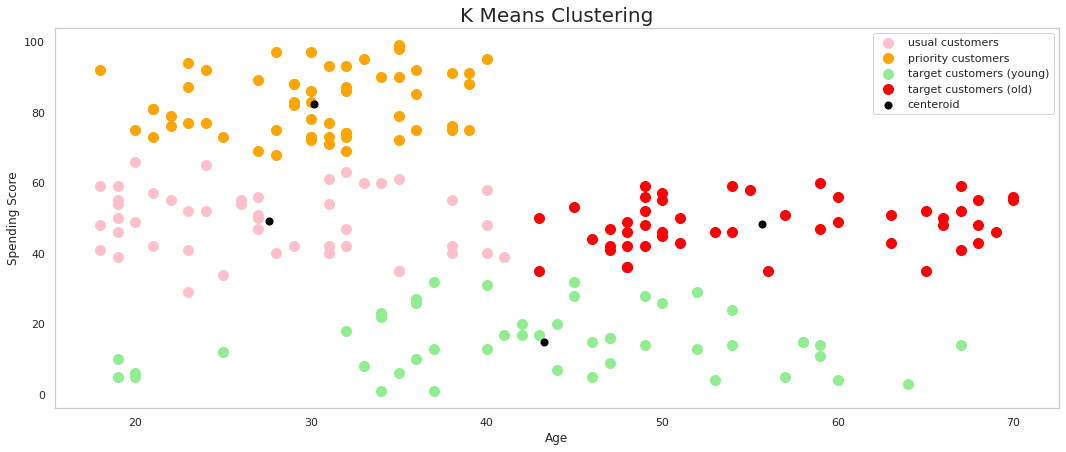

In [52]:
km = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 300, n_init= 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0,0], x[y_means == 0,1], s = 100, c = 'pink', label = 'usual customers')
plt.scatter(x[y_means == 1,0], x[y_means == 1,1], s = 100, c = 'orange', label = 'priority customers')
plt.scatter(x[y_means == 2,0], x[y_means == 2,1], s = 100, c = 'lightgreen', label = 'target customers (young)')
plt.scatter(x[y_means == 3,0], x[y_means == 3,1], s = 100, c = 'red', label = 'target customers (old)')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 50, c = 'black', label = 'centeroid')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

**Using Hierarchial Clustering**

***Using Dendrograms to find the no. of Optimal Clusters***

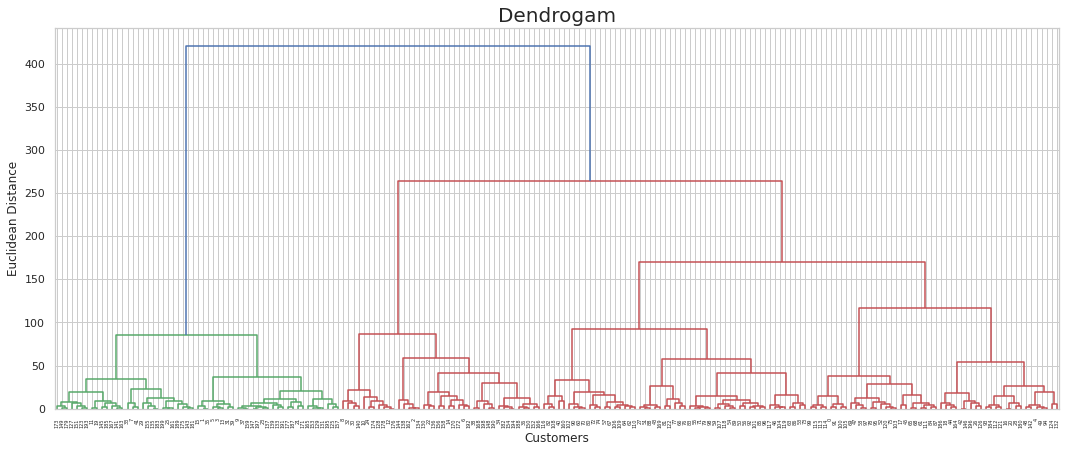

In [53]:
from scipy.cluster import hierarchy as sch

dendogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

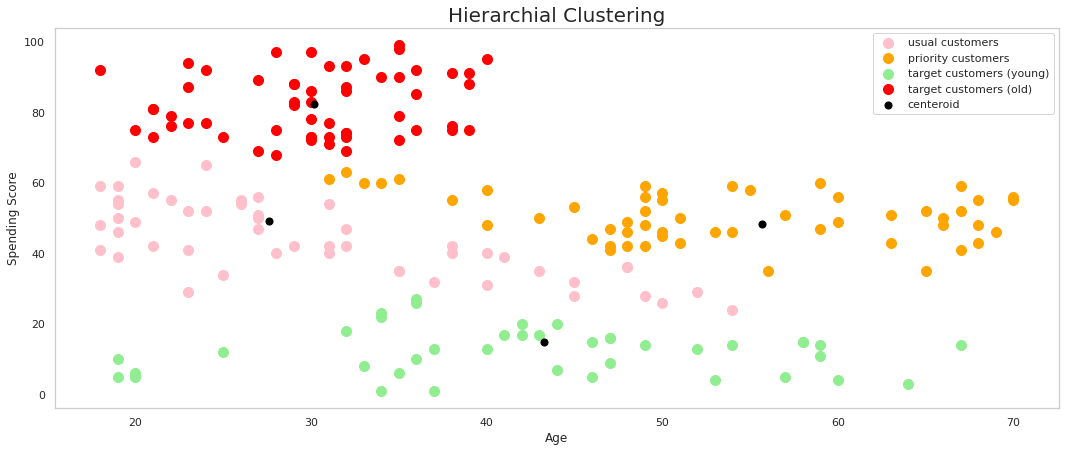

In [54]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0,0], x[y_hc == 0,1], s = 100, c = 'pink', label = 'usual customers')
plt.scatter(x[y_hc == 1,0], x[y_hc == 1,1], s = 100, c = 'orange', label = 'priority customers')
plt.scatter(x[y_hc == 2,0], x[y_hc == 2,1], s = 100, c = 'lightgreen', label = 'target customers (young)')
plt.scatter(x[y_hc == 3,0], x[y_hc == 3,1], s = 100, c = 'red', label = 'target customers (old)')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 50, c = 'black', label = 'centeroid')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [56]:
x = dataset[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

In [60]:
import plotly.graph_objs as go
import plotly.offline as py

dataset['labels'] =  labels
trace1 = go.Scatter3d(
    x= dataset['Age'],
    y= dataset['Spending Score (1-100)'],
    z= dataset['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = dataset['labels'], 
        size= 10,
        line=dict(
            color= dataset['labels'],
            width= 12
        ),
        opacity=0.8
            )
)
df = [trace1]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data = df, layout = layout)
py.iplot(fig)